# ASSIGNEMNT 1 : Mobile Price Classification
 Mark has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
 He does not know how to estimate price of mobiles his company creates.
 In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales   
 data of mobile phones of various companies.

 Mark wants to find out some relation between features of a mobile phone (eg:- RAM,Internal  
 Memory etc) and its selling price. But he is not so good at Machine Learning.
 So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the  
price is.

Develop a Deep Learning model using keras and Tensorflow framework to categorise the mobiles.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_test = pd.read_csv('/content/drive/MyDrive/Mobiletest.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Mobiletrain.csv')

In [5]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df_train.head()
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [7]:
df_train.describe()
df_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [8]:
df_train.isna().sum()
df_test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler
X_train = df_train.drop('price_range', axis=1)
y_train = df_train['price_range']
X_test = df_test.drop('id', axis=1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
num_price_ranges = len(df_train['price_range'].unique())
print("Number of Price Ranges:", num_price_ranges)

Number of Price Ranges: 4


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_price_ranges, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(X_train_scaled, y_train, epochs=55, batch_size=32)

Epoch 1/55
63/63 [==============================] - 1s 2ms/step - loss: 1.3575 - accuracy: 0.3200
Epoch 2/55
63/63 [==============================] - 0s 2ms/step - loss: 1.1828 - accuracy: 0.5200
Epoch 3/55
63/63 [==============================] - 0s 2ms/step - loss: 0.8928 - accuracy: 0.7005
Epoch 4/55
63/63 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.7870
Epoch 5/55
63/63 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.8185
Epoch 6/55
63/63 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.8490
Epoch 7/55
63/63 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8730
Epoch 8/55
63/63 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8825
Epoch 9/55
63/63 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8960
Epoch 10/55
63/63 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8965
Epoch 11/55
63/63 [

In [13]:
predictions = model.predict(X_test_scaled)

32/32 [==============================] - 0s 1ms/step


In [14]:
predicted_price_ranges = predictions.argmax(axis=1)
print(predicted_price_ranges)

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 3 0 2 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 1 3 1 1 3 3 3 0 1 0 1 2 3 1 2 1 2 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 3 0 1 2 2 1 2 2 1 2 1 2 1 0 0 3 0 2 1 1 2 3 3
 2 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 3 2 0 2 2 1 3 1 1 0 3 2 1 2 1 3 2 3 3 3
 2 3 2 3 1 0 3 2 3 3 2 3 2 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 1 3 1 0 2 2 2 2 1 2 3 2 3 2 2 1 0 0 1 2 0 2 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 3 1 3 0 3 1 2 0 0 2 1 3 2 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 0 2 3 1 1 3 2 0 3 0 0 2 1 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 2 2 2 3 3 0 3 0 3 1 3 1 2 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 0 0 2 2 3 2 3 0 3 0 3 0 1 1 0 2 0 3 2 3 3 1 3 1 3 1 2 2 0 1 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 2 0 0 3 1 1 0 2 3 3 0 3 0 2 3 2 3 0 2 0 2 2 0 1 2 0 0 1
 1 1 3 3 3 2 3 1 2 2 3 3 

In [15]:
price_range_mapping = {0: 'Low Price',1: 'Medium Price',2: 'High Price',3: 'Very High Price'}
predicted_price_ranges_labels = [price_range_mapping[range_val] for range_val in predicted_price_ranges]
print(predicted_price_ranges_labels)

['Very High Price', 'Very High Price', 'High Price', 'Very High Price', 'Medium Price', 'Very High Price', 'Very High Price', 'Medium Price', 'Very High Price', 'Low Price', 'Very High Price', 'Very High Price', 'Low Price', 'Low Price', 'High Price', 'Low Price', 'High Price', 'Medium Price', 'Very High Price', 'High Price', 'Medium Price', 'Very High Price', 'Medium Price', 'Medium Price', 'Very High Price', 'Low Price', 'High Price', 'Low Price', 'Very High Price', 'Low Price', 'High Price', 'Low Price', 'Very High Price', 'Low Price', 'Medium Price', 'Medium Price', 'Very High Price', 'Medium Price', 'High Price', 'Medium Price', 'Medium Price', 'High Price', 'Low Price', 'Low Price', 'Low Price', 'Medium Price', 'Low Price', 'Very High Price', 'Medium Price', 'High Price', 'Medium Price', 'Low Price', 'Very High Price', 'Low Price', 'Very High Price', 'Medium Price', 'Very High Price', 'Medium Price', 'Medium Price', 'Very High Price', 'Very High Price', 'Very High Price', 'Low Pr

In [16]:
most_common_price_range = np.argmax(np.bincount(predicted_price_ranges))
print("Most Common Predicted Price Range:", most_common_price_range)

Most Common Predicted Price Range: 2


**assignment 1 result**    
The most common expected price range is 2

#ASSIGNMENT 2 FASHION EMNIST DATASET
Develop a Deep learning model using Fashion_Mnist dataset to identify and predict the various products that it contains. You can use the in built dataset found in Keras.datasets.

In [17]:

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing data shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)

print("Sample data:")
print("Image")
print("Label:", train_labels[0])
print("Pixels:")
print(train_images[0])
print()

4422102/4422102 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)
Sample data:
Image
Label: 9
Pixels:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 2

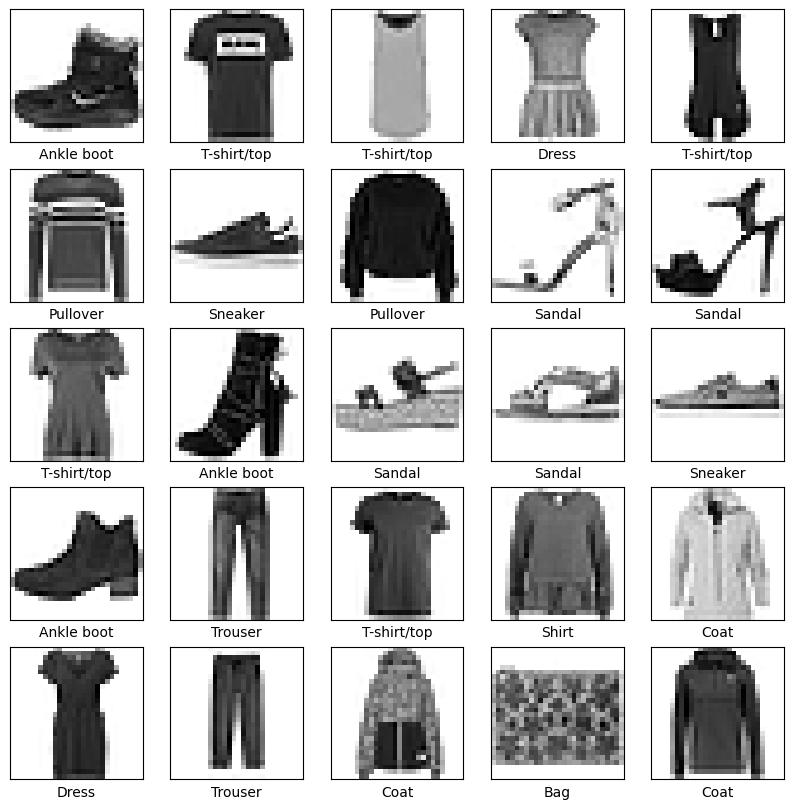

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [20]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [21]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 93s 49ms/step - loss: 0.1709 - accuracy: 0.9369 - val_loss: 0.2498 - val_accuracy: 0.9124
Epoch 2/5
1875/1875 [==============================] - 104s 56ms/step - loss: 0.1471 - accuracy: 0.9458 - val_loss: 0.2459 - val_accuracy: 0.9181
Epoch 3/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.1261 - accuracy: 0.9532 - val_loss: 0.2352 - val_accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1055 - accuracy: 0.9600 - val_loss: 0.2594 - val_accuracy: 0.9189
Epoch 5/5
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0882 - accuracy: 0.9668 - val_loss: 0.2864 - val_accuracy: 0.9162


In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 4s - loss: 0.2864 - accuracy: 0.9162 - 4s/epoch - 14ms/step
Test accuracy: 0.9161999821662903


313/313 [==============================] - 3s 11ms/step


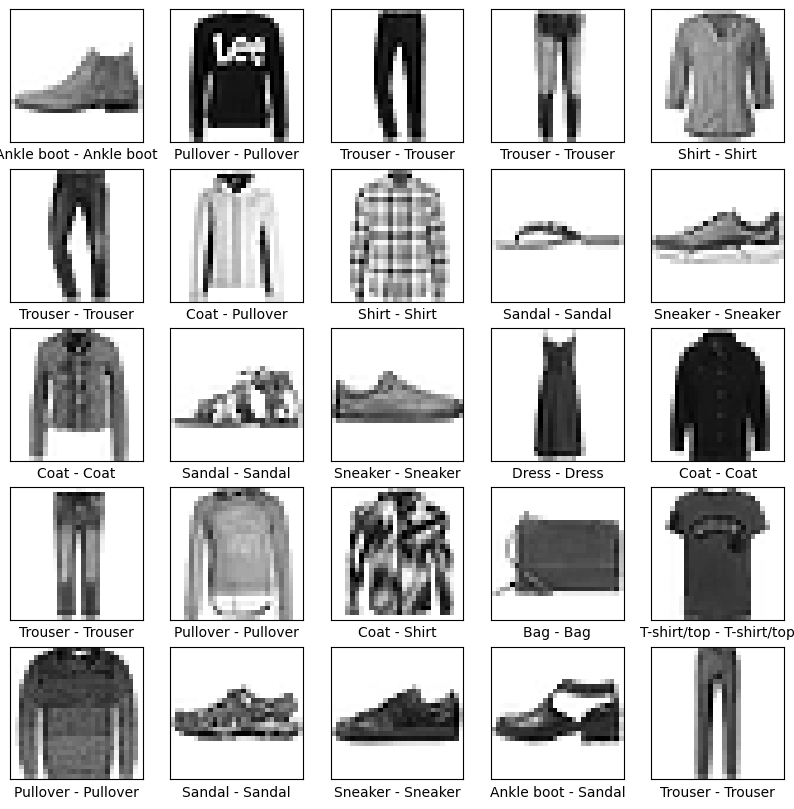

In [25]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"{class_names[test_labels[i]]} - {class_names[predicted_labels[i]]}")
plt.show()

**Assignment 2 result**      
 Model has named all inputs clearly

#ASSIGNMENT 3:
given palmerpenguins dataset has size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.And the physical attributes are:    
 1. flipper length, beak length, beak width, body mass, and sex.
 2. this is to Develop a Deep learning model to predict the penguin species using attributes of the species.

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
species_df = pd.read_csv('/content/drive/MyDrive/penguins.csv')

In [27]:
species_df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [28]:
species_df.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [29]:
species_df = species_df.drop(['rowid', 'year','sex','island'], axis=1)

In [30]:
species_df.dropna(inplace=True)

In [31]:
species_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 16.0+ KB


In [32]:
X = species_df.drop(['species'], axis=1)
print(X)
y = species_df['species']
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7              181.0       3750.0
1              39.5           17.4              186.0       3800.0
2              40.3           18.0              195.0       3250.0
4              36.7           19.3              193.0       3450.0
5              39.3           20.6              190.0       3650.0
..              ...            ...                ...          ...
339            55.8           19.8              207.0       4000.0
340            43.5           18.1              202.0       3400.0
341            49.6           18.2              193.0       3775.0
342            50.8           19.0              210.0       4100.0
343            50.2           18.7              198.0       3775.0

[342 rows x 4 columns]
0         Adelie
1         Adelie
2         Adelie
4         Adelie
5         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
34

In [33]:
encoder = LabelEncoder()
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=20)

Epoch 1/10
14/14 [==============================] - 1s 2ms/step - loss: 0.9625 - accuracy: 0.6447
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.8791
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.8938
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.9121
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.9414
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9670
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.9744
Epoch 8/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9817
Epoch 9/10
14/14 [==============================] - 0s 2ms/step - loss: 0.0879 - accuracy: 0.9817
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9890


In [37]:
y_test_encoded = label_encoder.transform(y_test)
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

3/3 [==============================] - 0s 5ms/step - loss: 0.0657 - accuracy: 0.9855
Test loss: 0.0657
Test accuracy: 0.9855


**Assignment 3 result**        
Thus the model moslty have labelled species of penguins properly

#ASSIGNMENT 4 :

1. The dataset heart.csv gives a number of variables along with a target to find whether person is having or not having heart disease.   
2. develop a deep learning model using only Tensorflow to use this data to create a model which tries to predict if a patient has this disease or not.



In [38]:
disease_df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [39]:
disease_df.describe()
disease_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
X = disease_df.drop("output", axis=1)
y = disease_df["output"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [45]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [46]:
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
8/8 - 1s - loss: 0.6743 - accuracy: 0.5744 - 1s/epoch - 148ms/step
Epoch 2/10
8/8 - 0s - loss: 0.6459 - accuracy: 0.6901 - 29ms/epoch - 4ms/step
Epoch 3/10
8/8 - 0s - loss: 0.6192 - accuracy: 0.7727 - 27ms/epoch - 3ms/step
Epoch 4/10
8/8 - 0s - loss: 0.5942 - accuracy: 0.7851 - 28ms/epoch - 4ms/step
Epoch 5/10
8/8 - 0s - loss: 0.5694 - accuracy: 0.8017 - 27ms/epoch - 3ms/step
Epoch 6/10
8/8 - 0s - loss: 0.5436 - accuracy: 0.8099 - 24ms/epoch - 3ms/step
Epoch 7/10
8/8 - 0s - loss: 0.5198 - accuracy: 0.8058 - 29ms/epoch - 4ms/step
Epoch 8/10
8/8 - 0s - loss: 0.4945 - accuracy: 0.8099 - 26ms/epoch - 3ms/step
Epoch 9/10
8/8 - 0s - loss: 0.4713 - accuracy: 0.8140 - 26ms/epoch - 3ms/step
Epoch 10/10
8/8 - 0s - loss: 0.4497 - accuracy: 0.8017 - 25ms/epoch - 3ms/step


In [47]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Test Loss: 0.42643049359321594
Test Accuracy: 0.8524590134620667


**result of 4th problem statement is**           
With test accuracy 0.8 model can be used to predict whether the person has heart disease or not


